# Model Selection and Evaluation

Assignment to predict the car prices accurately using machine learning algorithm


In [58]:
# Import packages
import pandas as pd
import datetime
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Data Preprocessing

In [24]:
# Reading the data
df = pd.read_csv('Car Dataset.csv')

In [25]:
df.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2529,Tata Indica Vista Terra 1.4 TDI,2010,100000,80000,Diesel,Individual,Manual,First Owner
1410,Audi A4 35 TDI Premium,2015,2300000,35000,Diesel,Individual,Automatic,Third Owner
2924,Hyundai Santro Xing GLS,2010,155000,90000,Petrol,Individual,Manual,Fourth & Above Owner
4226,Maruti Swift Dzire ZDI,2015,484999,90000,Diesel,Individual,Manual,Second Owner
1578,Maruti Swift VDI BSIV,2015,450000,70000,Diesel,Individual,Manual,Third Owner
1829,Toyota Innova 2.5 VX (Diesel) 7 Seater,2013,950000,80000,Diesel,Individual,Manual,Third Owner
623,Audi A6 2.0 TDI Premium Plus,2013,1300000,58500,Diesel,Dealer,Automatic,First Owner
2104,Hyundai i20 Asta 1.4 CRDi,2014,370000,80000,Diesel,Individual,Manual,Second Owner
3406,Nissan Terrano XL Plus 85 PS,2015,490000,70000,Diesel,Individual,Manual,First Owner
1731,Maruti Swift Ldi BSIV,2011,350000,133000,Diesel,Individual,Manual,Second Owner


In [26]:
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [27]:
# checking dimensions
df.shape

(4340, 8)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


# Name

In [30]:
# Let's explore the various cars in the dataset.

df["name"].value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

As it appears, there are several cars in the dataset, some of them with a count higher than 1. Sometimes the resale value of a car also depends on manufacturer of car and hence, I'll extract the manufacturer from this column and add it to the dataset.

In [31]:
df["Manufacturer"]=df["name"].str.split(' ', expand=True)[0]

Text(0, 0.5, 'Count of cars')

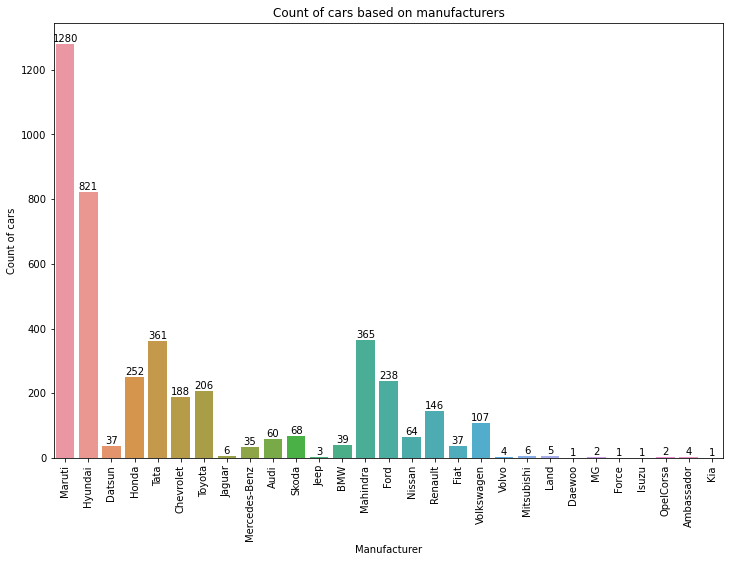

In [32]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

Maximum cars in the dataset are by the manufacturer <b>Maruti</b> and there are no null values.

# Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [38]:
curr_time = datetime.datetime.now()
df['Car_age'] = df['year'].apply(lambda x : curr_time.year - x)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Manufacturer,Car_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,12
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,10
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,10
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,10
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,15
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,8


# Encoding Categorical Variables:

Let's perform one-hot encoding for categorical variables 'fuel', 'seller_type', 'transmission', and 'owner'.

In [96]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [39]:
df['Manufacturer'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [97]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [98]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [41]:
# Perform one-hot encoding
data = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner', 'Manufacturer'], drop_first=True)
data.drop(['name', 'year'], axis =1, inplace =True)

In [42]:
data

,selling_price,km_driven,Car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,Manufacturer_Mercedes-Benz,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_OpelCorsa,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,60000,70000,17,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,135000,50000,17,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,600000,100000,12,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,250000,46000,7,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,450000,141000,10,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,10,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4336,409999,80000,10,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4337,110000,83000,15,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4338,865000,90000,8,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


# Feature Scaling:

Since the features 'selling_price', and 'km_driven' are in different scales, we might want to scale them. Let's scale 'year' and 'km_driven' using standardization.

In [43]:
# Initialize the scaler
scaler = StandardScaler()
# Scale 'year' and 'km_driven'
data[['km_driven']] = scaler.fit_transform(data[['km_driven']])

In [44]:
data

,selling_price,km_driven,Car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,Manufacturer_Mercedes-Benz,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_OpelCorsa,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,60000,0.081139,17,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,135000,-0.347689,17,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,600000,0.724381,12,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,250000,-0.433455,7,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,450000,1.603479,10,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,0.295553,10,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4336,409999,0.295553,10,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4337,110000,0.359877,15,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4338,865000,0.509967,8,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection

Correlation Analysis:
Analyzing the correlation between features and the target variable as well as between features themselves can help identify redundant features. Features highly correlated with the target variable and less correlated with other features are usually preferred.

In [45]:
correlation = data.corr()["selling_price"].abs().sort_values(ascending=False)
print("Correlation with selling_price:")
print(correlation)

Correlation with selling_price:
selling_price                   1.000000
transmission_Manual             0.530205
Car_age                         0.413922
Manufacturer_BMW                0.401857
Manufacturer_Mercedes-Benz      0.354215
Manufacturer_Audi               0.292174
fuel_Diesel                     0.282947
fuel_Petrol                     0.269453
seller_type_Individual          0.236798
km_driven                       0.192289
Manufacturer_Land               0.182329
Manufacturer_Maruti             0.180798
Manufacturer_Toyota             0.162161
owner_Second Owner              0.161986
Manufacturer_Tata               0.114574
owner_Third Owner               0.111326
seller_type_Trustmark Dealer    0.110176
Manufacturer_Volvo              0.107745
Manufacturer_Jaguar             0.100662
Manufacturer_Chevrolet          0.098361
owner_Fourth & Above Owner      0.078725
Manufacturer_Hyundai            0.070294
Manufacturer_MG                 0.049677
owner_Test Drive Car     

In [46]:
data.corr()

,selling_price,km_driven,Car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,Manufacturer_Mercedes-Benz,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_OpelCorsa,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,...,0.354215,0.021603,-0.011460,-0.015427,-0.027335,-0.003078,-0.114574,0.162161,-0.009094,0.107745
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,...,-0.044987,0.059910,0.006476,0.009339,-0.075188,0.044299,0.062762,0.163598,0.029182,0.013371
Car_age,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,...,-0.002948,0.019928,-0.025484,0.051406,-0.102707,0.031330,0.050435,0.000437,-0.008914,-0.015560
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,...,0.059961,0.025097,0.046838,-0.021304,0.011686,0.071495,0.089971,0.138290,0.062169,0.030612
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,...,-0.001369,-0.000565,-0.001857,-0.000326,-0.002832,-0.001915,-0.004573,0.068007,-0.002414,-0.000461
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,...,-0.006581,-0.002716,-0.008930,-0.001567,-0.013619,-0.009209,-0.021986,-0.016294,-0.011605,-0.002217
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,...,-0.057313,-0.024005,-0.043238,0.021942,-0.006184,-0.067787,-0.082773,-0.133901,-0.057491,-0.029722
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,...,-0.089900,0.007354,0.009513,0.012481,-0.015089,-0.029157,0.117464,-0.002439,-0.044388,-0.017300
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,...,-0.013988,-0.005772,-0.018980,-0.003331,-0.012074,-0.019573,-0.046729,0.072664,-0.024665,-0.004712
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,...,-0.248829,-0.007758,0.035224,0.007285,0.038100,-0.109648,0.082996,-0.048920,-0.048616,-0.089523


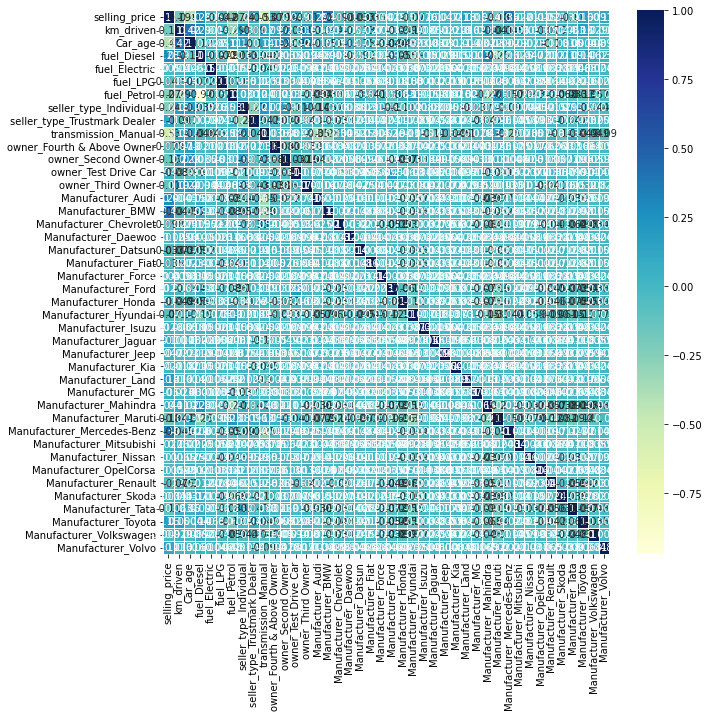

In [47]:
fig, ax = mp.subplots(figsize=(10,10))  
sb.heatmap(data.corr(), cmap="YlGnBu", annot=True, linewidths=.5, ax=ax) 
mp.show()

From Correlation Analysis we can observe that :

1. The selling price of a car typically decreases as the car’s year (age) increases. In other words, older cars tend to have lower prices compared to newer ones.

2. If the car is test Drive car still it has high selling value.

3. Disel, Electric and Petrol car has high selling price compare to Lpg and CNG.

4. Selling Price of car increase if car having automatic transmission.

5. Selling Price of car increase if it sell by Trustmark Dealer

In [48]:
# Split the dataset into features and target variable

X = data.drop(["selling_price"], axis=1)  # Features
y = data["selling_price"]  # Target variable


In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training

<b>Random Forest Regression:</b>

Explanation: Random Forest is an ensemble learning method that builds multiple decision trees during training and combines their predictions to improve accuracy and reduce overfitting. Each tree in the forest is trained on a random subset of the training data and a random subset of features.

Suitability: Random Forest Regression is suitable for car price prediction due to its ability to handle both numerical and categorical features, capture non-linear relationships, and handle outliers and missing values effectively. It is robust, easy to implement, and less prone to overfitting compared to individual decision trees.

In [50]:
# 1. Random Forest Regression with Hyperparameter Tuning

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
print("Started")
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=5, scoring='neg_root_mean_squared_error')
rf_grid.fit(X_train, y_train)
print("End")
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
print("Random Forest RMSE:", rf_rmse)
print("Best Random Forest Parameters:", rf_grid.best_params_)


Started
End
Random Forest RMSE: 285927.14323222573
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [51]:
# 2. Gradient Boosting Regression with Hyperparameter Tuning
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid=gb_params, cv=5, scoring='neg_root_mean_squared_error')
gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_
gb_pred = gb_best.predict(X_test)
gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)
print("Gradient Boosting RMSE:", gb_rmse)
print("Best Gradient Boosting Parameters:", gb_grid.best_params_)


Gradient Boosting RMSE: 291058.47275640524
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 300}


In [52]:
# 3. Support Vector Regression (SVR) with Hyperparameter Tuning
svr_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svr_grid = GridSearchCV(SVR(), param_grid=svr_params, cv=5, scoring='neg_root_mean_squared_error')
svr_grid.fit(X_train, y_train)
svr_best = svr_grid.best_estimator_
svr_pred = svr_best.predict(X_test)
svr_rmse = mean_squared_error(y_test, svr_pred, squared=False)
print("SVR RMSE:", svr_rmse)
print("Best SVR Parameters:", svr_grid.best_params_)

SVR RMSE: 525874.7960078574
Best SVR Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [76]:
# Train Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=300, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_accuracy = r2_score(y_test, rf_pred)
print("Random Forest MSE:", rf_mse)
print("Random Forest accuracy score:", rf_accuracy)

Random Forest MSE: 73353650111.16113
Random Forest accuracy score: 0.7596304310871312


In [69]:
# Train Gradient Boosting Regression
gb_regressor = GradientBoostingRegressor(n_estimators=300, random_state=42)
#gb_regressor = GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, max_depth=3, min_samples_leaf=1, random_state=42)
gb_regressor.fit(X_train, y_train)
gb_pred = gb_regressor.predict(X_test)
gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)
gb_accuracy = r2_score(y_test, gb_pred)
print("Gradient Boosting RMSE:", gb_rmse)
print("Gradient Boosting Accuracy Score:", gb_accuracy)


Gradient Boosting RMSE: 291058.47275640524
Gradient Boosting Accuracy Score: 0.7224007761364457


In [59]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
linerReg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linerReg_accuracy = r2_score(y_test, y_pred)
print("SVR RMSE:", linerReg_rmse)
print("SVR Accuracy Score:", linerReg_accuracy)

SVR RMSE: 378760.3688532228
SVR Accuracy Score: 0.5299037175130452


In [81]:
# Train SVR
svr_regressor = SVR(kernel='linear', C=10, gamma='scale')
svr_regressor.fit(X_train, y_train)
svr_pred = svr_regressor.predict(X_test)
svr_rmse = mean_squared_error(y_test, svr_pred, squared=False)
svr_accuracy = r2_score(y_test, svr_pred)
print("SVR RMSE:", svr_rmse)
print("SVR Accuracy Score:", svr_accuracy)

SVR RMSE: 525874.7960078574
SVR Accuracy Score: 0.09380331674990539


In [56]:
# Compare and analyze the results
print("\nPerformance Comparison:")
print("Random Forest RMSE:", rf_rmse)
print("Gradient Boosting RMSE:", gb_rmse)
print("SVR RMSE:", svr_rmse)

# Identify the better-performing model
if rf_rmse < gb_rmse and rf_rmse < svr_rmse:
    print("\nRandom Forest Regression is the better-performing model.")
elif gb_rmse < rf_rmse and gb_rmse < svr_rmse:
    print("\nGradient Boosting Regression is the better-performing model.")
else:
    print("\nSupport Vector Regression (SVR) is the better-performing model.")
    


Performance Comparison:
Random Forest RMSE: 285927.14323222573
Gradient Boosting RMSE: 307034.9136228764
SVR RMSE: 569574.3781308916

Random Forest Regression is the better-performing model.
